# Doctor's Consultation Fees

#### Problem Statement-
- To build a model to predict the doctor’s consulting fee.

In [1]:
#importing libraies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#calling read_excel as to read excel file

In [4]:
df=pd.read_excel("Doctor's Consultation Fees_Train.xlsx")

In [5]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [6]:
#There are 7 columns and 5961 rows in total

In [7]:
#checking columns names
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [8]:
#checking shape
df.shape

(5961, 7)

In [9]:
#checking data type
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

Apart from fees every column is object type, (i.e) it is in string value.

In [10]:
#describing data
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [11]:

#Only fee is displaying as it is the only column which is in int format.
#looking st fees it shows that there are outliers in the data set, well treat them in pre-processing.


## Checking Null Values

In [12]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

There are null values in rating, which is ordinal.
While Miscellaneous_Info is categorical type.
###we'll treat missing values respectivly.

In [13]:
##### We will be using mode to replace the null values in Rating, as it is obj type.

In [14]:
df.mode()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,100


In [15]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])

In [16]:
df['Rating'].isnull().sum()

0

In [17]:
df['Place'] = df['Place'].fillna(df['Place'].mode()[0])

In [18]:
df['Place'].isnull().sum()

0

In [19]:
# We will replace null value of Miscellaneous_Info with 0, because every doctor has their own Miscellaneous_Info that is very diffrent with the other.

In [20]:
 df['Miscellaneous_Info'] = df['Miscellaneous_Info'].fillna(0)

In [21]:
df['Miscellaneous_Info'].isnull().sum()

0

In [22]:
#rechecking for NaN calues.
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [23]:
#we have removed every nan values.

In [24]:
#Looking for other missing values that might be possibily be in dataset

In [25]:
df==" "

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5956,False,False,False,False,False,False,False
5957,False,False,False,False,False,False,False
5958,False,False,False,False,False,False,False
5959,False,False,False,False,False,False,False


In [26]:
# Looks good, we have succesfully removed every NaN value

# Exploratory Data Analysis 

In [27]:
#UniVariate Analysis

In [28]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,0,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,0,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [29]:
#to display maximum number of rows
pd.set_option('display.max_rows', 1000)

In [30]:
print(df['Qualification'].value_counts())

BDS                                                                                                                                                                                                   488
BHMS                                                                                                                                                                                                  477
BAMS                                                                                                                                                                                                  471
MBBS                                                                                                                                                                                                  334
MBBS, MS - ENT                                                                                                                                                                                  

## Feature Engineering

In [31]:
# Lets make few more columns to seperate data.

### I'll be splitting Qualification columns into four colums and joing them with the main dataframe

In [32]:
df['Qualification'].str.split(',',n=1)

0                [BHMS,  MD - Homeopathy]
1         [BAMS,  MD - Ayurveda Medicine]
2       [MBBS,  MS - Otorhinolaryngology]
3                  [BSc - Zoology,  BAMS]
4                                  [BAMS]
                      ...                
5956                    [MBBS,  MS - ENT]
5957                               [MBBS]
5958                               [MBBS]
5959       [MBBS,  MD - General Medicine]
5960           [BDS,  MDS - Orthodontics]
Name: Qualification, Length: 5961, dtype: object

In [33]:
quali=df['Qualification'].str.split(',',n=1,expand=True)

In [34]:
quali

,0,1
0,BHMS,MD - Homeopathy
1,BAMS,MD - Ayurveda Medicine
2,MBBS,MS - Otorhinolaryngology
3,BSc - Zoology,BAMS
4,BAMS,None
...,...,...
5956,MBBS,MS - ENT
5957,MBBS,None
5958,MBBS,None
5959,MBBS,MD - General Medicine


In [35]:
quali[0].str.split('-',n=1)

0                 [BHMS]
1                 [BAMS]
2                 [MBBS]
3       [BSc ,  Zoology]
4                 [BAMS]
              ...       
5956              [MBBS]
5957              [MBBS]
5958              [MBBS]
5959              [MBBS]
5960               [BDS]
Name: 0, Length: 5961, dtype: object

In [36]:
fnquali=quali[0].str.split('-',n=1,expand=True)

In [37]:
fnquali

,0,1
0,BHMS,None
1,BAMS,None
2,MBBS,None
3,BSc,Zoology
4,BAMS,None
...,...,...
5956,MBBS,None
5957,MBBS,None
5958,MBBS,None
5959,MBBS,None


In [38]:
#using rename to rename the columns:

fnquali.rename(columns={0:'Q1', 1:"Q2"},inplace=True)

In [39]:
fnquali

,Q1,Q2
0,BHMS,None
1,BAMS,None
2,MBBS,None
3,BSc,Zoology
4,BAMS,None
...,...,...
5956,MBBS,None
5957,MBBS,None
5958,MBBS,None
5959,MBBS,None


In [40]:
fnquali['Q2']= fnquali['Q2'].replace('None',np.nan)

In [41]:
fnquali.isnull().sum()

Q1       0
Q2    5304
dtype: int64

In [42]:
#splitting "-"

In [43]:
quali[1].str.split('-',n=1)

0                [ MD ,  Homeopathy]
1         [ MD ,  Ayurveda Medicine]
2       [ MS ,  Otorhinolaryngology]
3                            [ BAMS]
4                               None
                    ...             
5956                    [ MS ,  ENT]
5957                            None
5958                            None
5959       [ MD ,  General Medicine]
5960          [ MDS ,  Orthodontics]
Name: 1, Length: 5961, dtype: object

In [44]:
# Here I'm making a new data frame. 
qualiii=quali[1].str.split('-',n=1,expand=True)

In [45]:
qualiii

,0,1
0,MD,Homeopathy
1,MD,Ayurveda Medicine
2,MS,Otorhinolaryngology
3,BAMS,None
4,None,None
...,...,...
5956,MS,ENT
5957,None,None
5958,None,None
5959,MD,General Medicine


In [46]:
#using rename to rename the columns:

qualiii.rename(columns={0:'Q3', 1:"Q4"},inplace=True)

In [47]:
qualiii

,Q3,Q4
0,MD,Homeopathy
1,MD,Ayurveda Medicine
2,MS,Otorhinolaryngology
3,BAMS,None
4,None,None
...,...,...
5956,MS,ENT
5957,None,None
5958,None,None
5959,MD,General Medicine


replacing none with np.nan

In [48]:
qualiii['Q3']= qualiii['Q3'].replace('None',np.nan)

In [49]:
qualiii['Q4']= qualiii['Q4'].replace('None',np.nan)

In [50]:
qualiii.isnull().sum()

Q3    1962
Q4    3390
dtype: int64

In [51]:
# combining two created dataframe.

In [52]:
Quali=pd.concat([fnquali,qualiii],axis=1)

In [53]:
Quali

,Q1,Q2,Q3,Q4
0,BHMS,None,MD,Homeopathy
1,BAMS,None,MD,Ayurveda Medicine
2,MBBS,None,MS,Otorhinolaryngology
3,BSc,Zoology,BAMS,None
4,BAMS,None,None,None
...,...,...,...,...
5956,MBBS,None,MS,ENT
5957,MBBS,None,None,None
5958,MBBS,None,None,None
5959,MBBS,None,MD,General Medicine


In [54]:
dff=pd.concat([Quali,df],axis=1)

In [55]:
dff

,Q1,Q2,Q3,Q4,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,None,MD,Homeopathy,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,BAMS,None,MD,Ayurveda Medicine,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,MBBS,None,MS,Otorhinolaryngology,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,0,300
3,BSc,Zoology,BAMS,None,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,None,None,None,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...,...,...,...,...
5956,MBBS,None,MS,ENT,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,None,None,None,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,0,100
5958,MBBS,None,None,None,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,MBBS,None,MD,General Medicine,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [56]:
dff.isnull().sum()

Q1                       0
Q2                    5304
Q3                    1962
Q4                    3390
Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info       0
Fees                     0
dtype: int64

In [57]:
Quali.dtypes

Q1    object
Q2    object
Q3    object
Q4    object
dtype: object

In [58]:
 dff['Q2'] = dff['Q2'].fillna(0)

In [59]:
 dff['Q3'] = dff['Q3'].fillna(0)

In [60]:
 dff['Q4'] = dff['Q4'].fillna(0)

In [61]:
dff.isnull().sum()

Q1                    0
Q2                    0
Q3                    0
Q4                    0
Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [62]:
print(dff['Q2'].value_counts())

0                                                     5304
 Dermatology                                            84
 ENT                                                    81
 Dermatology                                            68
 Homeopathy                                             56
 Ayurveda Medicine                                      38
 General Medicine                                       29
 Otorhinolaryngology                                    28
 Oral & Maxillofacial Surgery                           26
 Conservative Dentistry & Endodontics                   25
 Physician                                              18
 Prosthodontics                                         17
 Dermatology & Venereology                              16
 Orthodontics                                           14
 Prosthodontist And Crown Bridge                        14
 Periodontology and Oral Implantology                   13
 Medicine                                               

In [63]:
print(dff['Q3'].value_counts())

0                                                                                                                                                                                                                                                                                                                                             1962
 MD                                                                                                                                                                                                                                                                                                                                           1124
 MDS                                                                                                                                                                                                                                                                                                                              

In [64]:
print(dff['Q4'].value_counts())

0                                                                                                                                                                                                                                                                                                                                 3390
 ENT                                                                                                                                                                                                                                                                                                                               306
 Dermatology                                                                                                                                                                                                                                                                                                                       202
 General Medicine  

In [65]:
print(dff['Q1'].value_counts())

MBBS                                                        2448
BDS                                                         1208
BAMS                                                         711
BHMS                                                         706
MD                                                           326
MDS                                                          154
MS                                                           110
DNB                                                           40
DHMS (Diploma in Homeopathic Medicine and Surgery)            36
Get inspired by remarkable stories of people like you         24
DDVL                                                          20
Diploma in Otorhinolaryngology (DLO)                          15
LCEH                                                          14
MDS                                                           13
B.Sc                                                           9
PhD                      

#### Lokking at the above stats..
#mostly the doctors are-
- MBBS                                                        
- BDS                                                         
- BAMS                                                         
- BHMS                                                         
- MD                                                           
- MDS                                                          
- MS                                                           
- DNB


### then comes 
- ent
- derma
- general med




In [66]:
#checking qulification
print(dff['Experience'].value_counts())

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
14 years experience    251
19 years experience    251
13 years experience    242
7 years experience     240
6 years experience     218
15 years experience    200
5 years experience     188
16 years experience    186
18 years experience    184
17 years experience    179
20 years experience    156
21 years experience    154
22 years experience    147
23 years experience    119
4 years experience     115
3 years experience     111
24 years experience     97
0 years experience      87
27 years experience     84
28 years experience     82
25 years experience     82
26 years experience     71
2 years experience      69
30 years experience     68
29 years experience     67
34 years experience     67
32 years experience     65
33 years experience     62
38 years experience     61
39 years experience     57
31 years experience     55
37 years experience     55
3

Mostly doctors have above 9 years of exp

In [67]:
# This is showing in str value, I'm changing that by removing (years experance)
# Then converting this into int.type

In [68]:
# I'm creating a nested loop for that.
# The data has " " and thers's a value containg of.

In [69]:
def exp(x):
    a=x.split(' ')
    b=x.split('of')
    if 'of' not in x:
        return a[0]
    else:
        return b[0]

In [70]:
df['Experience']=df['Experience'].apply(exp)

In [71]:
df['Experience'] = pd.to_numeric(df['Experience'])

In [72]:
df["Experience"].dtypes

dtype('int64')

In [73]:
df['Experience'].max()

66

there are maximum 323 doctors with experiance of 9 years.
then there are doctors with 10 years of experiance.
----Very few doctors have experiance of 58= years.
----There are also 87 doctors who recently started practicing with experiance of 0 years.

In [74]:
# Here I'm removing the % in Rating column

In [75]:
def removeper (x):
    a=x.split('%')
    return a[0]

In [76]:
df["Rating"]=df["Rating"].apply(removeper)

In [77]:
df["Rating"]

0       100
1        98
2       100
3       100
4       100
       ... 
5956     98
5957    100
5958     97
5959     90
5960    100
Name: Rating, Length: 5961, dtype: object

In [78]:
# This method was not working so i tried doing it with a new one.
#                (df["Experience"].astype(int))

In [79]:
df["Rating"]=df["Rating"].astype(str).astype(int)

In [80]:
df["Rating"].dtype

dtype('int32')

In [81]:
#checking rating of doctors.
print(df['Rating'].value_counts())

100    3986
98      290
99      259
97      241
96      220
95      178
94      115
93      109
92       66
90       66
91       60
89       42
88       41
85       27
82       23
83       21
86       21
80       19
77       16
87       14
84       13
79       13
67       12
81       12
71        9
76        9
75        8
73        8
74        7
60        7
78        6
56        5
68        5
69        4
70        4
57        3
72        3
33        2
64        2
62        2
63        2
55        2
48        1
40        1
7         1
65        1
45        1
53        1
47        1
58        1
36        1
Name: Rating, dtype: int64


3986 doctors have rating of100.
while there are very few doctors who have rating less than 50%.

In [82]:
#Checking place of the doctors.
print(df['Place'].value_counts())

HSR Layout, Bangalore                     100
Andheri West, Mumbai                       70
Dwarka, Delhi                              67
Banjara Hills, Hyderabad                   64
Mulund West, Mumbai                        54
Borivali West, Mumbai                      52
Kandivali West, Mumbai                     50
Indiranagar, Bangalore                     48
Whitefield, Bangalore                      47
Malad West, Mumbai                         47
Malleswaram, Bangalore                     47
Pitampura, Delhi                           45
Vileparle West, Mumbai                     43
Andheri East, Mumbai                       43
Powai, Mumbai                              42
Jubilee Hills, Hyderabad                   40
Marathahalli, Bangalore                    39
Bannerghatta Road, Bangalore               39
Kondapur, Hyderabad                        38
Bandra West, Mumbai                        38
Ghatkopar East, Mumbai                     38
Adyar, Chennai                    

In [83]:
# this looks cluttred, I'll make this simple by only selecting cities, and deopping areas in place column.

In [84]:
#for that i'll be calling split func.

In [85]:
df['Place'].str.split(',',n=1)

0                 [Kakkanad,  Ernakulam]
1               [Whitefield,  Bangalore]
2          [Mathikere - BEL,  Bangalore]
3        [Bannerghatta Road,  Bangalore]
4               [Keelkattalai,  Chennai]
                      ...               
5956          [Basavanagudi,  Bangalore]
5957            [Nungambakkam,  Chennai]
5958    [Greater Kailash Part 2,  Delhi]
5959           [Vileparle West,  Mumbai]
5960                 [Pitampura,  Delhi]
Name: Place, Length: 5961, dtype: object

In [86]:
# Here I'm making a new data frame. 
D=df['Place'].str.split(',',n=1,expand=True)

In [87]:
#using rename to rename the columns:

D.rename(columns={0:'Area', 1:"City"},inplace=True)

In [88]:
D

,Area,City
0,Kakkanad,Ernakulam
1,Whitefield,Bangalore
2,Mathikere - BEL,Bangalore
3,Bannerghatta Road,Bangalore
4,Keelkattalai,Chennai
...,...,...
5956,Basavanagudi,Bangalore
5957,Nungambakkam,Chennai
5958,Greater Kailash Part 2,Delhi
5959,Vileparle West,Mumbai


In [89]:
#usning concat func to merge both data frames

In [90]:
DF=pd.concat([df,D],axis=1)

In [91]:
DF.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,100,"Mathikere - BEL, Bangalore",ENT Specialist,0,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,100,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [92]:
DF.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
Area                  0
City                  1
dtype: int64

In [93]:
DF['City'] = DF['City'].fillna(DF['City'].mode()[0])

In [94]:
DF.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
Area                  0
City                  0
dtype: int64

In [95]:
#Checking City of the doctors.
print(DF['City'].value_counts())

 Bangalore             1284
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5, Delhi          1
Name: City, dtype: int64


Here we see that  Sector 5, Delhi is showing as it is a new city, lets change that.

In [96]:
# I'm trying to find out row that has this 'Sector 5, Delhi ' as specific value

In [97]:
#so I'm using Lambda func to map,
DF[DF['City'].map(lambda xyz:'Sector 5, Delhi' in xyz )]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
2169,BDS,11,100,"Dwarka, Sector 5, Delhi",Dentist,0,250,Dwarka,"Sector 5, Delhi"


In [98]:
type(DF['City'])

pandas.core.series.Series

In [99]:
#using replace function for string.

In [100]:
DF['City'] = DF.City.str.replace('Sector 5, Delhi', 'Delhi')

In [101]:
#Checking City of the doctors.
print(DF['City'].value_counts())


 Bangalore             1284
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Name: City, dtype: int64


There are many doctors in Bangalore than in Thiruvananthapuram 

In [102]:
#Checking Profile of the doctors.
print(DF['Profile'].value_counts())

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


There are more Dentist than ENT specialist in our dataset.
we have General MEdicine, Dema,, homeopathy and Ayurveda

- Now when Place column has been dividen into Area and City.
- There is no point keeping it, as it will result in duplicacy of dataset


# I'll be dropping place column as it will repeate the column.

In [103]:
#Dropping place column
DF.drop(['Place'], axis = 1,inplace=True)

In [104]:
#Checking Miscellaneous_Info of the doctors.
print(DF['Miscellaneous_Info'].value_counts())

0                                                                            2620
Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth             40
Dental Fillings Zirconia Crowns Dental Implant Fixing                          12
Tooth Extraction Dental Fillings Scaling / Polishing                           12
Skin Allergy Treatment Skin Allergies Dermabrasion                              9
                                                                             ... 
99% 7 Feedback Saravanampatti, Coimbatore                                       1
94% 21 Feedback Vijayanagar, Bangalore                                          1
Automated Pathology E C G Chronic Disorder Clinic                               1
Ceramic Crowns and Bridges Fixing Space Closures Periodontal Flap Surgery       1
93% 4 Feedback Malakpet, Hyderabad                                              1
Name: Miscellaneous_Info, Length: 2999, dtype: int64


- Dropping Miscellaneous_Info
- Miscellaneous info doesn't show any data as so significant output, and also 
- The data in miscellaneous info is has a lot of null values that were filled earlier.
- Already in the other cells. such as (Rating, Area, Place)

In [105]:
DF.drop(['Miscellaneous_Info'], axis = 1, inplace=True)

In [106]:
DF

,Qualification,Experience,Rating,Profile,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,100,ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,100,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,250,Keelkattalai,Chennai
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,ENT Specialist,300,Basavanagudi,Bangalore
5957,MBBS,33,100,General Medicine,100,Nungambakkam,Chennai
5958,MBBS,41,97,General Medicine,600,Greater Kailash Part 2,Delhi
5959,"MBBS, MD - General Medicine",15,90,General Medicine,100,Vileparle West,Mumbai


In [107]:
#Checking Fees of the doctors.
print(DF['Fees'].value_counts())

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


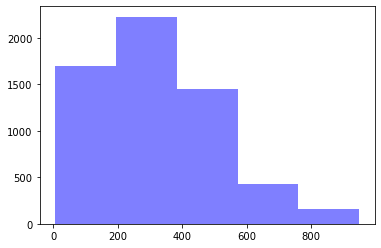

In [108]:
num_bins = 5
n, bins, patches = plt.hist(DF['Fees'], num_bins, facecolor='blue', alpha=0.5)
plt.show()

mostly doctors are charging above 500+ as the consultaion fee, there are very few doctors who charge less than 100 bucks.
Themajority of doctors are charging around 250 bucks.

### MultiVariate Analysis

In [109]:
# Fees and Experience

In [110]:
DF.groupby('Fees')['Experience'].value_counts()

Fees  Experience
5     6              1
10    3              1
      4              1
20    44             1
30    9              1
      15             1
      35             1
      45             1
40    22             1
      37             1
50    20             8
      15             5
      7              4
      12             4
      13             4
      16             4
      18             4
      45             4
      8              3
      11             3
      14             3
      19             3
      39             3
      0              2
      17             2
      22             2
      23             2
      25             2
      29             2
      4              1
      5              1
      6              1
      10             1
      24             1
      27             1
      31             1
      33             1
      34             1
      36             1
      37             1
      38             1
      41             1
      43         

In [111]:
# Fees and City

In [112]:
DF.groupby('Fees')['City'].value_counts()

Fees  City               
5      Thiruvananthapuram      1
10     Ernakulam               1
       Mumbai                  1
20     Hyderabad               1
30     Mumbai                  2
       Bangalore               1
       Hyderabad               1
40     Mumbai                  2
50     Mumbai                 46
       Delhi                  10
       Coimbatore              8
       Bangalore               6
       Hyderabad               5
       Chennai                 3
       Ernakulam               3
60     Mumbai                  8
       Bangalore               1
       Coimbatore              1
       Delhi                   1
70     Mumbai                 12
       Bangalore               2
       Ernakulam               2
       Chennai                 1
       Coimbatore              1
80     Mumbai                  7
       Chennai                 2
       Delhi                   1
       Ernakulam               1
       Thiruvananthapuram      1
100    Mumbai    

In [113]:
DF[DF["Fees"]>500]

,Qualification,Experience,Rating,Profile,Fees,Area,City
10,"MBBS, MS, DNB - ENT",5,100,ENT Specialist,700,Thousand Lights,Chennai
52,"MBBS, DDVL",22,100,Dermatologists,650,Madhapur,Hyderabad
55,"MBBS, MS - ENT, MRCS (UK)",25,36,ENT Specialist,600,Whitefield,Bangalore
78,"MD - Dermatology, MBBS",12,97,Dermatologists,600,Shalimar Bagh,Delhi
87,"MBBS, MD - Dermatology , Venereology & Leprosy",33,100,Dermatologists,700,Tuglakabad,Delhi
96,"MD - Dermatology , Venereology & Leprosy, MBBS",13,97,Dermatologists,700,Green Park,Delhi
125,"MBBS, DDV",15,95,Dermatologists,600,Chandivali,Mumbai
128,MBBS,5,100,General Medicine,800,Greater Kailash Part 1,Delhi
131,"MBBS, MD - Dermatology",12,100,Dermatologists,800,Panchsheel Park,Delhi
141,MBBS,13,96,General Medicine,750,Jubilee Hills,Hyderabad


In [114]:
(DF["Fees"]>500).value_counts()

False    5351
True      610
Name: Fees, dtype: int64

There are 610 Doctors who charge more than 500 bucks.

In [115]:
DF[DF['Fees']>500]['Profile'].value_counts()

Dermatologists      193
General Medicine    155
ENT Specialist      154
Homeopath            64
Dentist              29
Ayurveda             15
Name: Profile, dtype: int64

This is the list of all the doctors who charge more than 500 bucks,
There are more Derma who charge more than Ayurveda doctors.

In [116]:
DF.groupby('Profile')['Rating'].value_counts().mean()

32.57377049180328

### Since the data set has a string values so we'll be using Encoding

#I'll be using Label Encoder as 
- ordinal encoder was showing mean of sum values as -inft and std as null

In [117]:
from sklearn.preprocessing import OrdinalEncoder
enr = OrdinalEncoder()

In [118]:
#making a loop for all object type of columns

for i in DF.columns:
    if DF[i].dtypes=='object':
        DF[i]=enr.fit_transform(DF[i].values.reshape(-1,1))

In [119]:
DF

,Qualification,Experience,Rating,Profile,Fees,Area,City
0,401.0,24,100,5.0,100,296.0,4.0
1,73.0,12,98,0.0,350,855.0,0.0
2,1135.0,9,100,3.0,300,452.0,0.0
3,464.0,12,100,0.0,250,68.0,0.0
4,10.0,20,100,0.0,250,335.0,1.0
...,...,...,...,...,...,...,...
5956,1075.0,19,98,3.0,300,70.0,0.0
5957,596.0,33,100,4.0,100,535.0,1.0
5958,596.0,41,97,4.0,600,215.0,3.0
5959,943.0,15,90,4.0,100,840.0,6.0


In [120]:
DF.dtypes

Qualification    float64
Experience         int64
Rating             int32
Profile          float64
Fees               int64
Area             float64
City             float64
dtype: object

In [121]:
DF.describe()

,Qualification,Experience,Rating,Profile,Fees,Area,City
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,17.303976,97.610636,2.441872,307.944640,410.120282,3.044623
std,413.842446,11.142798,5.881539,1.658014,190.920373,255.174855,2.298823
min,0.000000,0.000000,7.000000,0.000000,5.000000,0.000000,0.000000
25%,219.000000,9.000000,98.000000,1.000000,150.000000,195.000000,1.000000
50%,596.000000,14.000000,100.000000,2.000000,300.000000,404.000000,3.000000
75%,943.000000,23.000000,100.000000,4.000000,500.000000,622.000000,5.000000
max,1419.000000,66.000000,100.000000,5.000000,950.000000,865.000000,7.000000


- The count is same for all the columns which mean the data is not null
- There is diffrence in Fee in mean and std.
- The difference between the 75% and max there are outliers in dataset.

In [122]:
DF.corr()

,Qualification,Experience,Rating,Profile,Fees,Area,City
Qualification,1.000000,0.134697,-0.163692,0.393123,0.263214,0.006612,-0.027738
Experience,0.134697,1.000000,-0.149594,0.202073,0.002117,0.015970,0.038942
Rating,-0.163692,-0.149594,1.000000,-0.047013,-0.154713,0.031431,0.064314
Profile,0.393123,0.202073,-0.047013,1.000000,0.145226,0.019533,-0.010721
Fees,0.263214,0.002117,-0.154713,0.145226,1.000000,-0.052750,-0.020196
Area,0.006612,0.015970,0.031431,0.019533,-0.052750,1.000000,-0.086705
City,-0.027738,0.038942,0.064314,-0.010721,-0.020196,-0.086705,1.000000


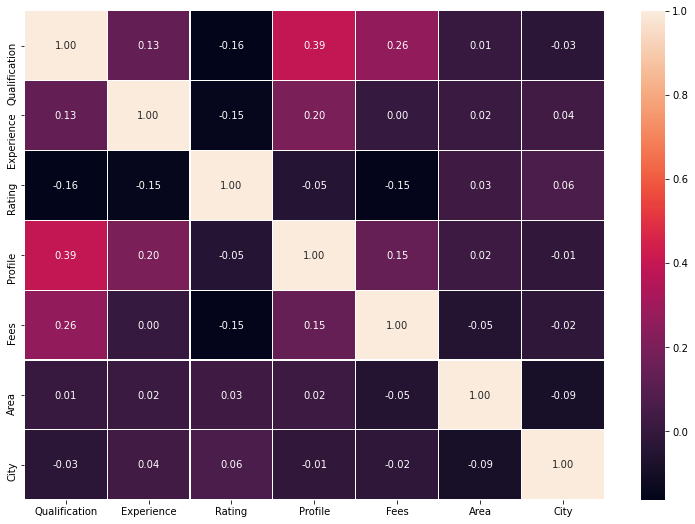

In [123]:
plt.subplots(figsize=(13,9))
sns.heatmap(DF.corr(),annot=True,linewidths=0.1,fmt='0.2f')
plt.show()

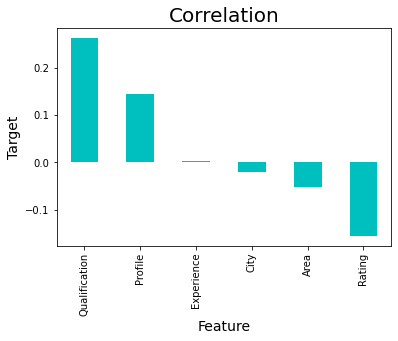

In [124]:
DF.corr()["Fees"].sort_values(ascending=False).drop(['Fees']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Target",fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

- this shows that the qualification has the highest corelation with Fee charged by the doctor.
- while area has negative corelation with the target which is fee
- Experience has almost no corelation with the Fee.

## Pre-Processing Pipeline

### Checking Outliers

Qualification
AxesSubplot(0.125,0.125;0.775x0.755)


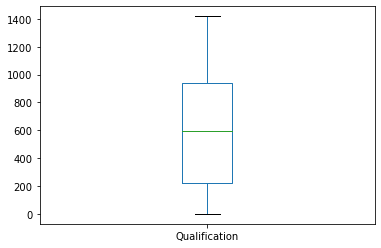

Experience
AxesSubplot(0.125,0.125;0.775x0.755)


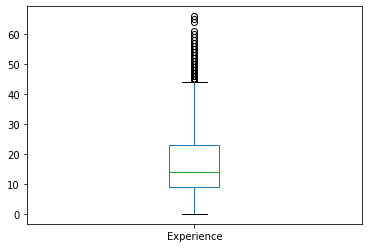

Rating
AxesSubplot(0.125,0.125;0.775x0.755)


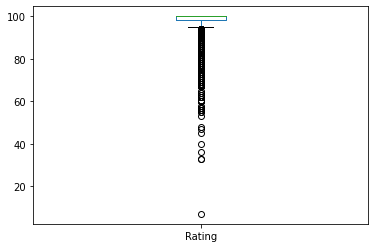

Profile
AxesSubplot(0.125,0.125;0.775x0.755)


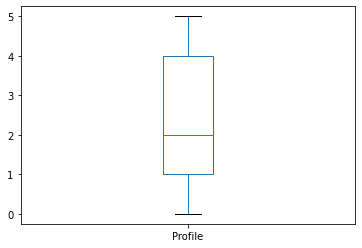

Fees
AxesSubplot(0.125,0.125;0.775x0.755)


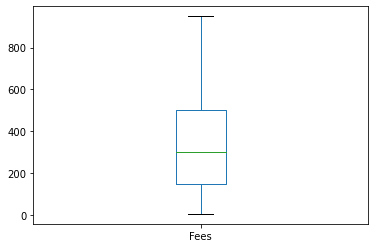

Area
AxesSubplot(0.125,0.125;0.775x0.755)


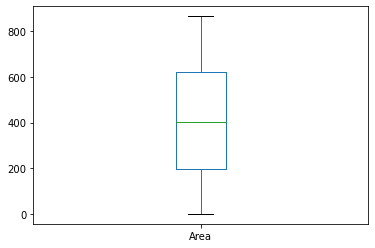

City
AxesSubplot(0.125,0.125;0.775x0.755)


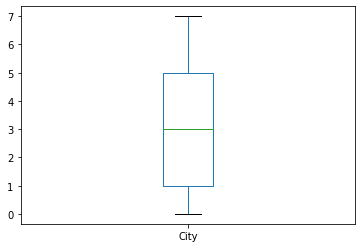

In [125]:
for i in DF:
    print(i)
    print(DF[i].plot.box())
    plt.show()

In [126]:
### Removing outliers

from scipy.stats import zscore

In [127]:
z=np.abs(zscore(DF))
z

array([[4.73305738e-01, 6.00978850e-01, 4.06282226e-01, ...,
        1.08926083e+00, 4.47261369e-01, 4.15628739e-01],
       [1.26594438e+00, 4.76040293e-01, 6.62066312e-02, ...,
        2.20295441e-01, 1.74357712e+00, 1.32453836e+00],
       [1.30046489e+00, 7.45295079e-01, 4.06282226e-01, ...,
        4.16158134e-02, 1.64135417e-01, 1.32453836e+00],
       ...,
       [2.07239780e-03, 2.12675597e+00, 1.03831166e-01, ...,
        1.52985171e+00, 7.64717393e-01, 1.94130368e-02],
       [8.36481290e-01, 2.06785507e-01, 1.29409575e+00, ...,
        1.08926083e+00, 1.68478896e+00, 1.28571229e+00],
       [8.55125573e-01, 2.72823168e-02, 4.06282226e-01, ...,
        5.65438323e-01, 7.32420892e-01, 1.94130368e-02]])

In [128]:
print(np.where(z>3))

print(np.where(z<3))

(array([  18,   55,   67,  105,  110,  140,  178,  183,  209,  275,  293,
        309,  325,  333,  372,  377,  458,  465,  585,  590,  632,  692,
        731,  787,  788,  810,  815,  851,  901,  911,  918,  968,  979,
        987,  990,  998, 1009, 1016, 1018, 1111, 1170, 1240, 1303, 1314,
       1392, 1425, 1433, 1437, 1444, 1475, 1592, 1594, 1614, 1631, 1635,
       1648, 1717, 1741, 1743, 1747, 1778, 1796, 1852, 1860, 1877, 1937,
       1981, 2023, 2062, 2089, 2161, 2165, 2202, 2252, 2262, 2277, 2281,
       2309, 2323, 2391, 2393, 2428, 2478, 2500, 2522, 2548, 2585, 2623,
       2631, 2646, 2670, 2708, 2715, 2726, 2738, 2758, 2829, 2833, 2962,
       2991, 3093, 3120, 3126, 3144, 3180, 3222, 3254, 3270, 3295, 3333,
       3365, 3367, 3463, 3478, 3493, 3526, 3537, 3593, 3604, 3608, 3615,
       3627, 3661, 3676, 3690, 3766, 3783, 3820, 3861, 3942, 3960, 4040,
       4052, 4055, 4058, 4135, 4167, 4174, 4212, 4212, 4219, 4257, 4344,
       4459, 4474, 4478, 4509, 4581, 4608, 4609, 4

In [129]:
df_new=DF[(z<3).all(axis=1)]

In [130]:
np.where(np.abs(zscore(df_new))>3)

(array([  37,   71,   77,  118,  136,  158,  164,  176,  207,  243,  251,
         377,  398,  399,  409,  519,  618,  661,  674,  688,  719,  781,
         809,  826,  834,  868,  960,  979, 1009, 1080, 1109, 1142, 1154,
        1202, 1206, 1241, 1255, 1275, 1371, 1641, 1647, 1699, 1732, 1740,
        1769, 1785, 1842, 1900, 1918, 1966, 1981, 2004, 2048, 2068, 2126,
        2132, 2163, 2197, 2198, 2248, 2269, 2331, 2344, 2387, 2391, 2395,
        2417, 2444, 2458, 2517, 2580, 2670, 2673, 2678, 2723, 2787, 2827,
        2831, 2874, 2927, 2934, 2966, 2975, 2987, 2988, 3004, 3028, 3066,
        3118, 3206, 3209, 3234, 3285, 3307, 3363, 3450, 3454, 3511, 3542,
        3587, 3593, 3676, 3734, 3743, 3772, 3827, 3880, 3925, 3945, 3954,
        3970, 3987, 4005, 4024, 4032, 4044, 4079, 4223, 4230, 4239, 4250,
        4257, 4317, 4361, 4414, 4427, 4428, 4429, 4443, 4472, 4500, 4529,
        4533, 4535, 4544, 4556, 4603, 4662, 4733, 4833, 4867, 4879, 4904,
        4913, 4930, 4982, 5013, 5070, 

In [131]:
df_new

,Qualification,Experience,Rating,Profile,Fees,Area,City
0,401.0,24,100,5.0,100,296.0,4.0
1,73.0,12,98,0.0,350,855.0,0.0
2,1135.0,9,100,3.0,300,452.0,0.0
3,464.0,12,100,0.0,250,68.0,0.0
4,10.0,20,100,0.0,250,335.0,1.0
...,...,...,...,...,...,...,...
5956,1075.0,19,98,3.0,300,70.0,0.0
5957,596.0,33,100,4.0,100,535.0,1.0
5958,596.0,41,97,4.0,600,215.0,3.0
5959,943.0,15,90,4.0,100,840.0,6.0


In [132]:
print(DF.shape)
df_new.shape



(5961, 7)


(5767, 7)

In [133]:
df_new.dtypes

Qualification    float64
Experience         int64
Rating             int32
Profile          float64
Fees               int64
Area             float64
City             float64
dtype: object

### Checking Skewness

In [134]:
from scipy.stats import skew

In [135]:
df_new.skew()

Qualification    0.278898
Experience       0.918798
Rating          -2.696433
Profile          0.138511
Fees             0.725505
Area             0.118220
City             0.000834
dtype: float64

Qualification
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 1419.0
Minimum : 0.0


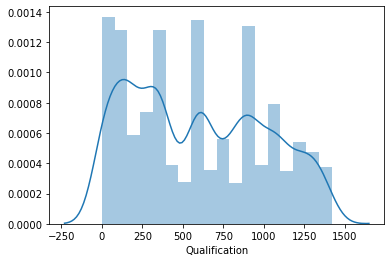

Experience
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 50
Minimum : 0


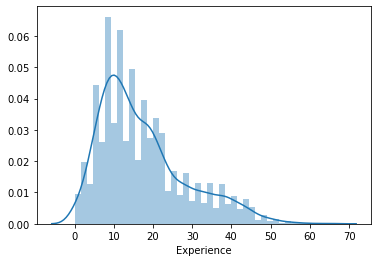

Rating
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 100
Minimum : 80


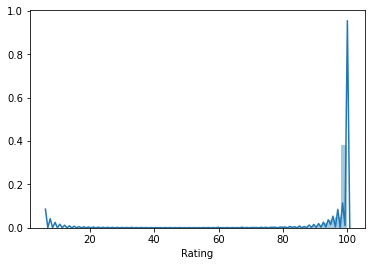

Profile
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 5.0
Minimum : 0.0


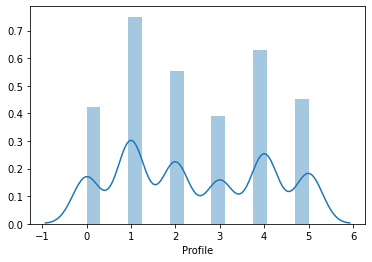

Fees
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 850
Minimum : 5


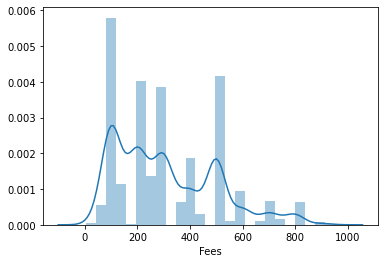

Area
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 865.0
Minimum : 0.0


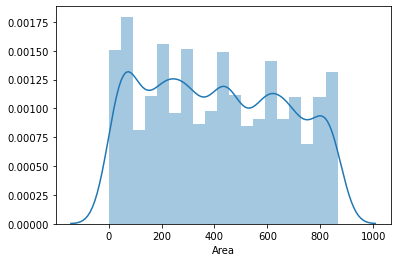

City
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 7.0
Minimum : 0.0


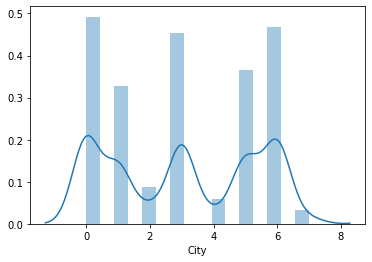

In [136]:
for i in df_new:
    print (i)
    print(sns.distplot(DF[i]))
    print("Maximum :" , df_new[i].max())
    print("Minimum :" , df_new[i].min())
    plt.show()

In [137]:
from scipy.stats import yeojohnson

In [138]:
df_new['Experience']=yeojohnson(df_new["Experience"],0)
df_new['Experience'].skew()

-0.9268878060008384

In [139]:
df_new['Rating']=yeojohnson(df_new['Rating'],0)
df_new['Rating'].skew()

-2.844321634597985

#now the training data has been done.
- Moving towards the test data.

# Making Data Set Ready For Machine Learning Models

### Seprating the columns into features and target:

In [140]:
features=df_new.drop('Fees',axis=1)
target=df_new["Fees"]

In [141]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5767 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5767 non-null   float64
 1   Experience     5767 non-null   float64
 2   Rating         5767 non-null   float64
 3   Profile        5767 non-null   float64
 4   Area           5767 non-null   float64
 5   City           5767 non-null   float64
dtypes: float64(6)
memory usage: 315.4 KB


In [142]:
features.shape

(5767, 6)

In [143]:
target.shape

(5767,)

- Both features and target have 5903 rows.

## Using Min-Max scaler

In [144]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [145]:
scaler=MinMaxScaler()
scaler.fit_transform(features)

array([[0.28259338, 0.81867207, 1.        , 1.        , 0.34219653,
        0.57142857],
       [0.05144468, 0.65235583, 0.90936447, 0.        , 0.98843931,
        0.        ],
       [0.79985906, 0.58562747, 1.        , 0.6       , 0.52254335,
        0.        ],
       ...,
       [0.42001409, 0.95061937, 0.86335772, 0.8       , 0.24855491,
        0.42857143],
       [0.6645525 , 0.70516574, 0.52752813, 0.8       , 0.97109827,
        0.85714286],
       [0.17124736, 0.73512206, 1.        , 0.2       , 0.69017341,
        0.42857143]])

## Building Machine Learning Models

In [146]:
# importing libraries
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [147]:
for i in range (0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=.1,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    
    print(f'At random state {i}, the training accuractarget is:  {r2_score(target_train,pred_train)}')
    print(f"At random state {i}, the testing accuractarget is:   {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training accuractarget is:  0.08600373370809711
At random state 0, the testing accuractarget is:   0.09568614867897518


At random state 1, the training accuractarget is:  0.08424512526729322
At random state 1, the testing accuractarget is:   0.11706070017450254


At random state 2, the training accuractarget is:  0.08954794832146229
At random state 2, the testing accuractarget is:   0.06282617629066711


At random state 3, the training accuractarget is:  0.08972522182470755
At random state 3, the testing accuractarget is:   0.06726219647074294


At random state 4, the training accuractarget is:  0.08749348049778427
At random state 4, the testing accuractarget is:   0.08362188825531269


At random state 5, the training accuractarget is:  0.08822791472194003
At random state 5, the testing accuractarget is:   0.07846584045039673


At random state 6, the training accuractarget is:  0.08527708048766047
At random state 6, the testing accuractarget is:   0.104338217638

In [162]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=.2,random_state=28)

In [163]:
lr.fit(features_train,target_train)

LinearRegression()

In [164]:
pred_test=lr.predict(features_test)

In [165]:
print(r2_score(target_test,pred_test))

0.09616506185394658


In [166]:
pred=lr.predict(features_test)

In [167]:
print("Predicted Result",pred)

Predicted Result [236.01821339 335.02327341 421.89569127 ... 252.68209611 323.60143008
 253.02101828]


In [168]:
print("Actual Result",target_test)

Actual Result 5321    300
1423    100
487     500
4204    300
3309    400
       ... 
1085     60
2502     50
111     100
2050     70
1740    500
Name: Fees, Length: 1154, dtype: int64


In [169]:
lr.score(features_train,target_train)

0.08480108063017355

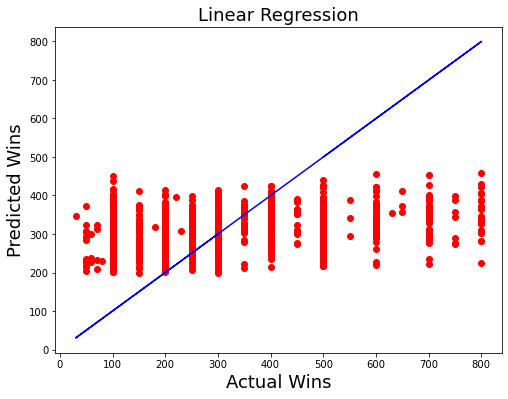

In [170]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test , color='red')
plt.plot(target_test,target_test,color='blue')
plt.xlabel("Actual Wins",fontsize=18)
plt.ylabel("Predicted Wins",fontsize=18)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Cross Validation of the model:

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [172]:
from sklearn.linear_model import Lasso

ls=Lasso(alpha=0.01,random_state=0)
ls.fit(features_train,target_train)
pred_ls = ls.predict(features_test)

lss=r2_score(target_test,pred_ls)
lss

0.09596806625699039

# Ensemble technique:

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [174]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs= r2_score(target_test,pred_decision)
print("R2 Score" , rfs*100)

rfscore= cross_val_score(rf,features,target,cv=8)
rfc= rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score 20.680359025720264
Cross Val Score: 17.985722434971436


In [212]:
#saving the model

import pickle

filename= "doctor_train.pkl"

pickle.dump(lr,open(filename,'wb'))


# Using Test data

### I'll apply the same methods here in test data as well.

In [213]:
test=pd.read_excel("Doctor's Consultation Fees_Test.xlsx")

test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [214]:
#checking columns names
test.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [215]:
#checking data type
test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [216]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [217]:
##### We will be using mode to replace the null values in Rating, as it is obj type.

In [218]:
test['Rating'] = test['Rating'].fillna(test['Rating'].mode()[0])

In [219]:
test['Place'] = test['Place'].fillna(test['Place'].mode()[0])

In [220]:
test['Miscellaneous_Info'] = test['Miscellaneous_Info'].fillna(0)

In [221]:
#rechecking for NaN calues.
test.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

### Simplifing Qualification

In [222]:
# calling exp

test['Experience']=test['Experience'].apply(exp)

In [223]:
#checking qulification
print(test['Experience'])

0       35
1       31
2       40
3        0
4       16
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: Experience, Length: 1987, dtype: object


### Simplifing Rating

In [224]:
# calling removeper



test["Rating"]=test["Rating"].apply(removeper)

In [225]:
test["Rating"]

0       100
1       100
2        70
3       100
4       100
       ... 
1982    100
1983    100
1984    100
1985     98
1986    100
Name: Rating, Length: 1987, dtype: object

### Simplifing Rating

In [226]:
test['Place'].str.split(',',n=1)

0            [Ghatkopar East,  Mumbai]
1       [West Marredpally,  Hyderabad]
2                 [KK Nagar,  Chennai]
3            [New Ashok Nagar,  Delhi]
4         [Kanakpura Road,  Bangalore]
                     ...              
1982        [Basavanagudi,  Bangalore]
1983               [Choolai,  Chennai]
1984                 [Porur,  Chennai]
1985             [Arekere,  Bangalore]
1986          [Pallikaranai,  Chennai]
Name: Place, Length: 1987, dtype: object

In [227]:
# Here I'm making a new data frame. 
D_t=test['Place'].str.split(',',n=1,expand=True)

In [228]:
#using rename to rename the columns:

D_t.rename(columns={0:'Area', 1:"City"},inplace=True)

In [229]:
D_t

,Area,City
0,Ghatkopar East,Mumbai
1,West Marredpally,Hyderabad
2,KK Nagar,Chennai
3,New Ashok Nagar,Delhi
4,Kanakpura Road,Bangalore
...,...,...
1982,Basavanagudi,Bangalore
1983,Choolai,Chennai
1984,Porur,Chennai
1985,Arekere,Bangalore


In [230]:
#usning concat func to merge both data frames


dt=pd.concat([test,D_t],axis=1)

In [231]:
dt

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Area,City
0,MBBS,35,100,"Ghatkopar East, Mumbai",General Medicine,0,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100,"West Marredpally, Hyderabad",ENT Specialist,0,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai
3,BAMS,0,100,"New Ashok Nagar, Delhi",Ayurveda,0,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore
...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,100,"Basavanagudi, Bangalore",Ayurveda,0,Basavanagudi,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,100,"Choolai, Chennai",Dermatologists,0,Choolai,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,100,"Porur, Chennai",General Medicine,0,Porur,Chennai
1985,BDS,12,98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,Arekere,Bangalore


In [232]:
dt.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Area                  0
City                  0
dtype: int64

In [233]:
# droping columns
dt.drop(['Place'], axis = 1,inplace=True)

In [234]:
dt.drop(['Miscellaneous_Info'], axis = 1, inplace=True)

In [235]:
dt

,Qualification,Experience,Rating,Profile,Area,City
0,MBBS,35,100,General Medicine,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100,ENT Specialist,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,70,Dermatologists,KK Nagar,Chennai
3,BAMS,0,100,Ayurveda,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,Kanakpura Road,Bangalore
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,100,Ayurveda,Basavanagudi,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,100,Dermatologists,Choolai,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,100,General Medicine,Porur,Chennai
1985,BDS,12,98,Dentist,Arekere,Bangalore


### Encoding Test DF

In [236]:
from sklearn.preprocessing import OrdinalEncoder
enr = OrdinalEncoder()

In [237]:
#making a loop for all object type of columns

for i in dt.columns:
    if dt[i].dtypes=='object':
        dt[i]=enr.fit_transform(dt[i].values.reshape(-1,1))

In [238]:
dt

,Qualification,Experience,Rating,Profile,Area,City
0,241.0,28.0,0.0,4.0,142.0,6.0
1,340.0,24.0,0.0,3.0,577.0,5.0
2,258.0,34.0,9.0,2.0,212.0,1.0
3,6.0,0.0,0.0,0.0,373.0,3.0
4,79.0,7.0,0.0,1.0,231.0,0.0
...,...,...,...,...,...,...
1982,17.0,1.0,0.0,0.0,58.0,0.0
1983,548.0,33.0,0.0,2.0,96.0,1.0
1984,474.0,56.0,0.0,4.0,423.0,1.0
1985,51.0,3.0,34.0,1.0,26.0,0.0


In [239]:
dt.dtypes

Qualification    float64
Experience       float64
Rating           float64
Profile          float64
Area             float64
City             float64
dtype: object

Qualification
AxesSubplot(0.125,0.125;0.775x0.755)


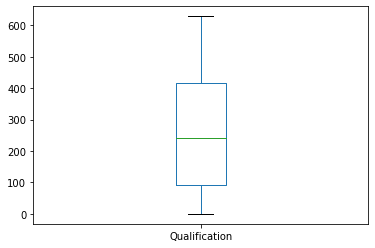

Experience
AxesSubplot(0.125,0.125;0.775x0.755)


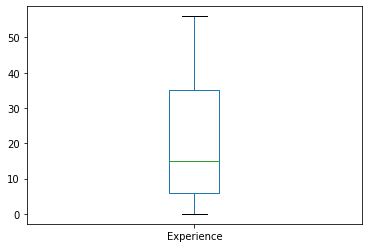

Rating
AxesSubplot(0.125,0.125;0.775x0.755)


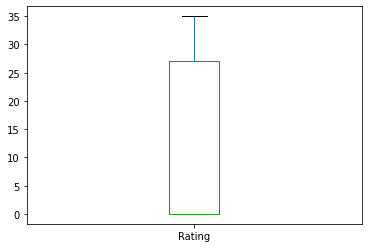

Profile
AxesSubplot(0.125,0.125;0.775x0.755)


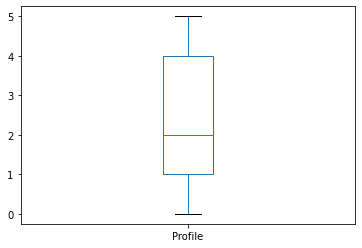

Area
AxesSubplot(0.125,0.125;0.775x0.755)


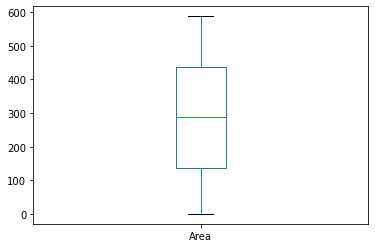

City
AxesSubplot(0.125,0.125;0.775x0.755)


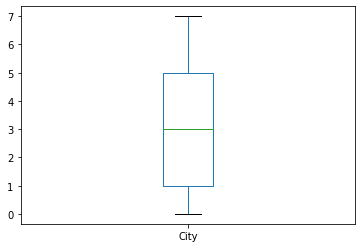

In [240]:
# checking outliers
for i in dt:
    print(i)
    print(dt[i].plot.box())
    plt.show()

In [241]:
#checking skewness
from scipy.stats import skew

In [242]:
dt.skew()

Qualification    0.280822
Experience       0.687595
Rating           0.850748
Profile          0.028926
Area             0.041189
City            -0.009157
dtype: float64

Qualification
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 629.0
Minimum : 0.0


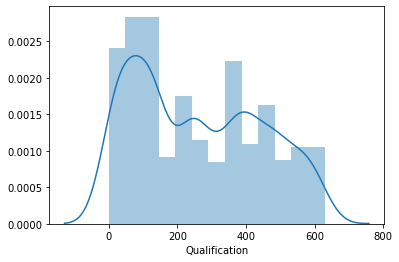

Experience
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 56.0
Minimum : 0.0


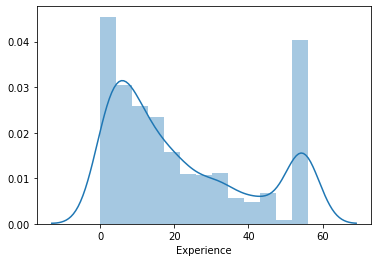

Rating
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 35.0
Minimum : 0.0


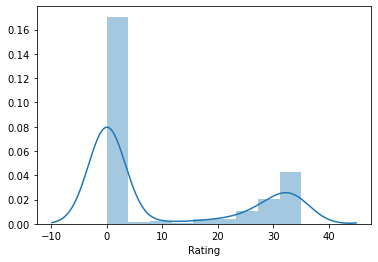

Profile
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 5.0
Minimum : 0.0


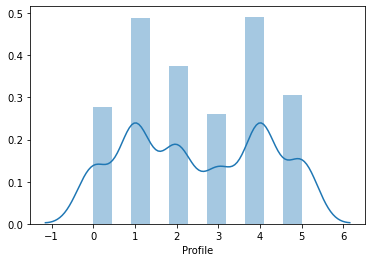

Area
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 588.0
Minimum : 0.0


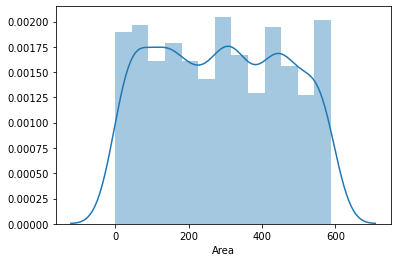

City
AxesSubplot(0.125,0.125;0.775x0.755)
Maximum : 7.0
Minimum : 0.0


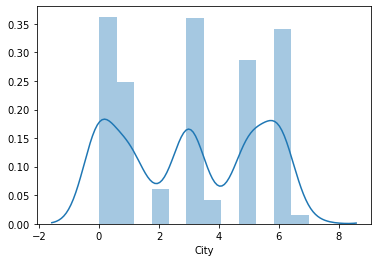

In [243]:
for i in dt:
    print (i)
    print(sns.distplot(dt[i]))
    print("Maximum :" , dt[i].max())
    print("Minimum :" , dt[i].min())
    plt.show()

In [244]:
dt['Experience']=yeojohnson(dt["Experience"],0)
dt['Experience'].skew()

-0.4744691071106135

In [245]:
dt['Rating']=yeojohnson(dt['Rating'],0)
dt['Rating'].skew()

0.7230901355675325

In [246]:
dt

,Qualification,Experience,Rating,Profile,Area,City
0,241.0,3.367296,0.000000,4.0,142.0,6.0
1,340.0,3.218876,0.000000,3.0,577.0,5.0
2,258.0,3.555348,2.302585,2.0,212.0,1.0
3,6.0,0.000000,0.000000,0.0,373.0,3.0
4,79.0,2.079442,0.000000,1.0,231.0,0.0
...,...,...,...,...,...,...
1982,17.0,0.693147,0.000000,0.0,58.0,0.0
1983,548.0,3.526361,0.000000,2.0,96.0,1.0
1984,474.0,4.043051,0.000000,4.0,423.0,1.0
1985,51.0,1.386294,3.555348,1.0,26.0,0.0


### My test data is ready

### Loading saved model

In [249]:
fitted_model = pickle.load(open("doctor_train.pkl",'rb'))

In [250]:
fitted_model

LinearRegression()

In [252]:
#making predictions

predictions=fitted_model.predict(dt)

In [253]:
predictions

array([2721.42904254, 2705.69788041, 1497.46734238, ..., 2740.92503366,
        806.25841631, 2720.44781078])